# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# Set empty lists to hold response data
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, append it to the cities list
    if city not in cities:
        cities.append(city)

# Print the number of cities contained in the cities list
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Set empty lists to hold response data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set up counters
index_counter = 0
set_counter = 1

# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval ")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each city
for index, city in enumerate(cities, start = 1):
    
    # Create search query, make request and store in json
    response = requests.get(query_url + city).json()
    
    # Try to grab the data for cities if they are available in the OpenWeatherMap API
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
    
    # Handle exceptions for a city that is not available in the OpenWeatherMap API
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : barrow
Processing Record 2 of Set 1 : yellowknife
Processing Record 3 of Set 1 : agropoli
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : tahoua
Processing Record 6 of Set 1 : bredasdorp
Processing Record 7 of Set 1 : basco
Processing Record 8 of Set 1 : fortuna
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : zeulenroda
Processing Record 11 of Set 1 : avarua
Processing Record 12 of Set 1 : albany
Processing Record 13 of Set 1 : itarema
Processing Record 14 of Set 1 : new norfolk
Processing Record 15 of Set 1 : kavieng
Processing Record 16 of Set 1 : bahia blanca
Processing Record 17 of Set 1 : port alfred
Processing Record 18 of Set 1 : umea
Processing Record 19 of Set 1 : balsas
Processing Record 20 of Set 1 : jamestown
Processing Record 21 of Set 1 : chigorodo
Processing Record 22 of Set 1 : torbay
Processing Record 23 of Set 1 : terney
Processing Record

Processing Record 37 of Set 4 : liusha
Processing Record 38 of Set 4 : kaitangata
Processing Record 39 of Set 4 : miri
Processing Record 40 of Set 4 : sabang
Processing Record 41 of Set 4 : zhigansk
City not found. Skipping...
Processing Record 42 of Set 4 : oussouye
Processing Record 43 of Set 4 : mouila
Processing Record 44 of Set 4 : lagoa
Processing Record 45 of Set 4 : paita
Processing Record 46 of Set 4 : port hardy
Processing Record 47 of Set 4 : severo-kurilsk
City not found. Skipping...
Processing Record 48 of Set 4 : portland
Processing Record 49 of Set 4 : dubbo
City not found. Skipping...
Processing Record 50 of Set 4 : makakilo city
Processing Record 0 of Set 5 : vao
Processing Record 1 of Set 5 : umkomaas
Processing Record 2 of Set 5 : sibu
Processing Record 3 of Set 5 : bam
Processing Record 4 of Set 5 : neryungri
Processing Record 5 of Set 5 : zharkent
Processing Record 6 of Set 5 : yanam
Processing Record 7 of Set 5 : valleyview
Processing Record 8 of Set 5 : eirunepe


Processing Record 22 of Set 8 : eichstatt
Processing Record 23 of Set 8 : kungurtug
Processing Record 24 of Set 8 : sao felix do xingu
Processing Record 25 of Set 8 : shingu
Processing Record 26 of Set 8 : churapcha
Processing Record 27 of Set 8 : beringovskiy
Processing Record 28 of Set 8 : pastavy
Processing Record 29 of Set 8 : necochea
Processing Record 30 of Set 8 : cabo san lucas
City not found. Skipping...
Processing Record 31 of Set 8 : rio grande
Processing Record 32 of Set 8 : atherton
Processing Record 33 of Set 8 : harper
Processing Record 34 of Set 8 : khao wong
Processing Record 35 of Set 8 : tete
Processing Record 36 of Set 8 : santa maria
Processing Record 37 of Set 8 : tazovskiy
Processing Record 38 of Set 8 : axim
Processing Record 39 of Set 8 : phak hai
Processing Record 40 of Set 8 : klaksvik
Processing Record 41 of Set 8 : kahului
Processing Record 42 of Set 8 : nioro
Processing Record 43 of Set 8 : egvekinot
Processing Record 44 of Set 8 : provideniya
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame
weather_data = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date,
})
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,33.82,86,90,16.11,US,1632029214
1,Yellowknife,62.4560,-114.3525,43.32,81,75,13.80,CA,1632029107
2,Agropoli,40.3469,14.9966,71.44,78,9,3.74,IT,1632029216
3,Mataura,-46.1927,168.8643,50.49,77,100,1.99,NZ,1632029218
4,Tahoua,14.8888,5.2692,78.78,83,0,4.61,NE,1632029219
...,...,...,...,...,...,...,...,...,...
560,Nemuro,43.3236,145.5750,68.43,84,54,6.78,JP,1632030067
561,Laichow,37.1717,119.9214,72.81,79,97,12.53,CN,1632030067
562,Fallon,39.4735,-118.7774,71.38,22,1,5.75,US,1632030068
563,St. George's,12.0564,-61.7485,76.68,88,20,0.00,GD,1632030070


In [5]:
# Exporting Data to csv
weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Inspecting data for cities that have a humidity of greater than 100%
weather_data.describe()

NameError: name 'weather_data' is not defined

## Inspection findings
The maximum humidity that was found from the list of cities was 100%. Therefore, this step is being skipped as there are no cities with a humidity of greater than 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [3]:
# Generate a scatter plot of latitude versus maximum temperature
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (19/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Max Temperature.png")
plt.show()

NameError: name 'weather_data' is not defined

## Latitude vs. Humidity Plot

In [4]:
# Generate a scatter plot of latitude versus humidity
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("City Latitude vs. Humidity (19/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()

NameError: name 'weather_data' is not defined

## Latitude vs. Cloudiness Plot

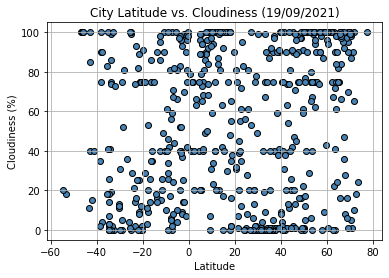

In [9]:
# Generate a scatter plot of latitude versus cloudiness
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (19/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

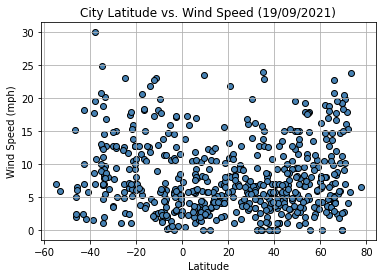

In [10]:
# Generate a scatter plot of latitude versus wind speed
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (19/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [11]:
# Create a DataFrame for each hemisphere
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

# Create linear regression model function
def linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
    plt.plot(x_values, regress_values, "m--")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "magenta")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7265100143676899


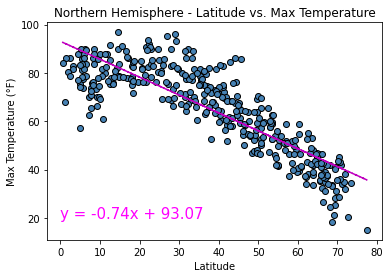

In [12]:
# Calculate the correlation coefficient and linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
linear_regression(x_values, y_values, "Max Temperature (°F)", (0, 20))

plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.savefig("output_data/Northern Hemisphere - Latitude vs. Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4673401358256615


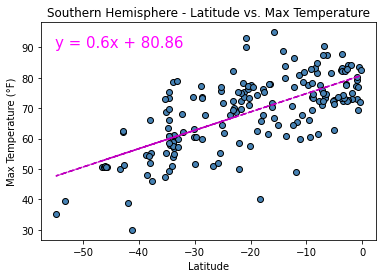

In [13]:
# Calculate the correlation coefficient and linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
linear_regression(x_values, y_values, "Max Temperature (°F)", (-55, 90))

plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.savefig("output_data/Southern Hemisphere - Latitude vs. Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006846852189232967


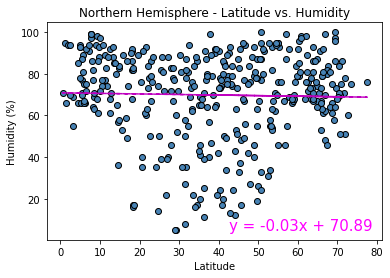

In [14]:
# Calculate the correlation coefficient and linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
linear_regression(x_values, y_values, "Humidity (%)", (42.5, 5))

plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.savefig("output_data/Northern Hemisphere - Latitude vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008103163504838722


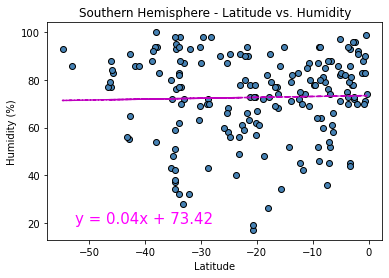

In [15]:
# Calculate the correlation coefficient and linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
linear_regression(x_values, y_values, "Humidity (%)", (-52.5, 20))

plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.savefig("output_data/Southern Hemisphere - Latitude vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01465823118095619


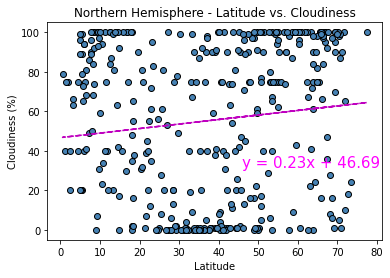

In [16]:
# Calculate the correlation coefficient and linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness (%)", (46, 32))

plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.savefig("output_data/Northern Hemisphere - Latitude vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.007694036869846157


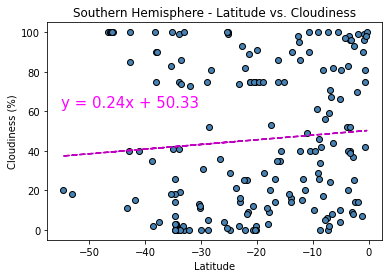

In [24]:
# Calculate the correlation coefficient and linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness (%)", (-55, 62))

plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.savefig("output_data/Southern Hemisphere - Latitude vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-value is: 0.04566067416403852


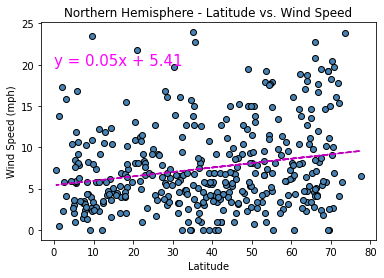

In [27]:
# Calculate the correlation coefficient and linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed (mph)", (0, 20))

plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.savefig("output_data/Northern Hemisphere - Latitude vs. Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-value is: 0.028587084253632565


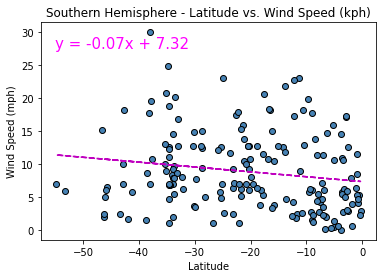

In [29]:
# Calculate the correlation coefficient and linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed (mph)", (-55, 27.55))

plt.title("Southern Hemisphere - Latitude vs. Wind Speed (kph)")
plt.savefig("output_data/Southern Hemisphere - Latitude vs. Wind Speed.png")
plt.show()